#Tarea_Académica_2

**Indicaciones iniciales:**

a)	No se evalúa la extensión de la respuesta sino la calidad de la respuesta.

b) Verifique que el código completo funciona antes de remitirlo.

c)	Suba el notebook en la carpeta ‘Tarea_Académica_2’ nombrando el archivo de la siguiente forma:

‘Tarea_Académica_2’ + un guión bajo + su primer apellido y su primer nombre

Ejemplo: Tarea_Académica_2_Villavicencio_Carmen



# 1. Introducción

En esta base de datos figuran préstamos que se han otorgado tomando en cuenta la información asociada al prestatario y datos de calificación del cliente/préstamo.

- Variables como el monto del préstamo, el score (calificación) del cliente, el propósito del préstamo, etc. son las variables predictoras.

- La variable loan_status indica si el préstamo fue totalmente pagado ('Fully Paid' = 0) o si el préstamo no fue totalmente pagado ('Charged Off' = 1).

El objetivo que tenemos es obtener el mejor modelo para clasificar los préstamos pagados y no pagados.

# 2. Definición de los datos

Contamos con la siguiente lista de variables:

01. index : Número de identificación de los préstamos otorgados.
02. loan_amnt : Monto del préstamo solicitado por el prestatario.
03. funded_amnt : Monto del préstamo concedido por el inversionista.
04. term : Número de pagos del préstamo. Los valores son de 36 y 60 meses.
05. int_rate : Tasa de interés del préstamo.
06. installment : Pago mensual adeudado por el prestatario si el préstamo se origina.
07. grade : Score del préstamo. El score A es el mejor.
08. emp_title : Empleo del prestatario al solicitar el préstamo.
09. emp_length : Antigüedad laboral en años. Los valores posibles van de 0 a 10 o más años.
10. home_ownership : Tipo de propiedad de vivienda informado por el prestatario. Incluye valores de: ALQUILER, PROPIO, etc.
11. annual_inc : Ingresos anuales informados por el prestatario durante.
12. verification_status : Indica si los ingresos informados por el prestatario fueron verificados (validados).
13. issue_d : Mes en el que se financió el préstamo.
14. loan_status : Estado actual del préstamo ('Fully Paid', 'Charged Off').
15. pymnt_plan : Indica si se ha establecido un plan de pagos para el préstamo.
16. purpose : Propósito del préstamo indicado por el prestatario en la solicitud de préstamo.
17. addr_state : Estado (lugar) en que el prestatario solicitó el préstamo.
18. dti : Proporción de pagos mensuales totales de deuda del prestatario entre la deuda total (excluye hipotecas y el préstamo solicitado)
19. delinq_2yrs : Número de veces en el que el prestatario incurrió en morosidad de 30 días o más en los últimos 2 años.
20. revol_util : Proporción de importe de uso de líneas revolventes en relación con todo el importe de líneas revolventes.
21. application_type : Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos codeudores.
22. pub_rec_bankruptcies : Número de quiebras del prestatario informadas en los registros públicos.



# 3.	Obtención de los datos

La información se encuentra consolidada en el siguiente archivo:
**dataset.xls.**

El diccionario de datos también se encuentra en el siguiente archivo:
**dataset_dictionary.xls.**


# 4.	Importación de librerías y módulos

In [1]:
# Escribir el código

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#5.	Carga de datos
Cargaremos la base de datos y haremos una navegación inicial.


In [3]:
# Escribir el código
data = pd.read_excel('data.xlsx')

Mostraremos las primeras 5 filas de la base de datos.

In [4]:
# Escribir el código
data.head()

,index,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,revol_util,application_type,pub_rec_bankruptcies
0,1,2400,2400,36,15.96,84.33,C,NaN,10+ years,RENT,...,Dec-2011,Fully Paid,s,small_business,IL,8.72,0.0,98.5,Individual,0.0
1,2,10000,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,Dec-2011,Fully Paid,s,other,CA,20.00,0.0,21.0,Individual,0.0
2,3,3000,3000,36,18.64,109.43,E,MKC Accounting,9 years,RENT,...,Dec-2011,Fully Paid,s,car,CA,5.35,0.0,87.5,Individual,0.0
3,4,5600,5600,60,21.28,152.39,F,NaN,4 years,OWN,...,Dec-2011,Charged Off,s,small_business,CA,5.55,0.0,32.6,Individual,0.0
4,5,5375,5375,60,12.69,121.45,B,Starbucks,< 1 year,RENT,...,Dec-2011,Charged Off,s,other,TX,18.08,0.0,36.5,Individual,0.0


Imprimiremos la información básica de la base de datos.

In [5]:
# Escribir el código
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 19908 non-null  int64  
 1   loan_amnt             19908 non-null  int64  
 2   funded_amnt           19908 non-null  int64  
 3   term                  19908 non-null  int64  
 4   int_rate              19908 non-null  float64
 5   installment           19908 non-null  float64
 6   grade                 19908 non-null  object 
 7   emp_title             18723 non-null  object 
 8   emp_length            19406 non-null  object 
 9   home_ownership        19905 non-null  object 
 10  annual_inc            19905 non-null  float64
 11  verification_status   19905 non-null  object 
 12  issue_d               19905 non-null  object 
 13  loan_status           19905 non-null  object 
 14  pymnt_plan            19908 non-null  object 
 15  purpose            

Imprimiremos el número de valores nulos de cada columna.



In [6]:
data.isnull().sum()

index                      0
loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_title               1185
emp_length               502
home_ownership             3
annual_inc                 3
verification_status        3
issue_d                    3
loan_status                3
pymnt_plan                 0
purpose                    3
addr_state                 9
dti                       11
delinq_2yrs                9
revol_util                28
application_type           0
pub_rec_bankruptcies     321
dtype: int64

Imprimiremos el conteo (o porcentaje) de categorías de la variable target.

In [7]:
# Escribir el código

In [8]:
conteo_loan_status = data['loan_status'].value_counts()
print(conteo_loan_status)

loan_status
Fully Paid     16962
Charged Off     2943
Name: count, dtype: int64


In [9]:
charged_off_proportion = (data['loan_status'].value_counts()[1] / len(data))*100
print("Proportion of Charged Off: {:.2f}%".format(charged_off_proportion))

Proportion of Charged Off: 14.78%


Determinar las varibles numéricas y categóricas



In [10]:
# Escribir el código

In [11]:
numericas = data.select_dtypes(include='number')
categoricas = data.select_dtypes(include=['object','category'])

In [12]:
numericas.head()

,index,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,1,2400,2400,36,15.96,84.33,12252.0,8.72,0.0,98.5,0.0
1,2,10000,10000,36,13.49,339.31,49200.0,20.00,0.0,21.0,0.0
2,3,3000,3000,36,18.64,109.43,48000.0,5.35,0.0,87.5,0.0
3,4,5600,5600,60,21.28,152.39,40000.0,5.55,0.0,32.6,0.0
4,5,5375,5375,60,12.69,121.45,15000.0,18.08,0.0,36.5,0.0


In [13]:
categoricas.head()

,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,application_type
0,C,NaN,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,s,small_business,IL,Individual
1,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,Fully Paid,s,other,CA,Individual
2,E,MKC Accounting,9 years,RENT,Source Verified,Dec-2011,Fully Paid,s,car,CA,Individual
3,F,NaN,4 years,OWN,Source Verified,Dec-2011,Charged Off,s,small_business,CA,Individual
4,B,Starbucks,< 1 year,RENT,Verified,Dec-2011,Charged Off,s,other,TX,Individual


In [14]:
# ¿Por qué es importante la distinción entre variables numéricas y categóricas?

```
# Escribir la respuesta
```

# 6. Exploratory Data Analysis (EDA)


Luego de navegar por la base datos podemos analizar las variables que pueden ayudarnos en este problema de clasificación.

Imprimiremos las estadística de las variables numéricas.

In [15]:
# Escribir el código

In [16]:
data.describe()

,index,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990500e+04,19897.000000,19899.000000,19880.000000,19587.000000
mean,9954.500000,11353.846444,11065.763763,42.095238,12.089717,330.614254,7.107471e+04,13.009893,0.144556,49.735425,0.037984
std,5747.088915,7463.700492,7176.276661,10.446974,3.698287,210.557434,6.981072e+04,6.663972,0.493507,49.816810,0.191430
min,1.000000,500.000000,500.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,4977.750000,5750.000000,5600.000000,36.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,26.500000,0.000000
50%,9954.500000,10000.000000,10000.000000,36.000000,11.860000,285.780000,6.000000e+04,13.080000,0.000000,50.300000,0.000000
75%,14931.250000,15000.000000,15000.000000,60.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,72.800000,0.000000
max,19908.000000,35000.000000,35000.000000,60.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,5829.000000,2.000000


Imprimiremos los valores únicos de las siguientes variables categórica (incluyendo su proporción):



In [17]:
variables = ['grade',	'emp_length',	'home_ownership',	'verification_status',	'purpose',	'application_type',	'pymnt_plan']

In [18]:
for variable in variables:
    print(f"Variable: '{variable}'")
    print(f"Valores únicos y su porcentaje:")
    counts = data[variable].value_counts()
    total = len(data)
    for valor, count in counts.items():
        porcentaje = (count / total) * 100
        print(f"{valor}: {porcentaje:.2f}%")
    print()

Variable: 'grade'
Valores únicos y su porcentaje:
B: 30.47%
A: 24.49%
C: 20.53%
D: 13.80%
E: 7.20%
F: 2.71%
G: 0.80%

Variable: 'emp_length'
Valores únicos y su porcentaje:
10+ years: 21.34%
< 1 year: 11.57%
2 years: 11.14%
3 years: 10.59%
4 years: 9.40%
5 years: 8.28%
1 year: 8.22%
6 years: 5.78%
7 years: 4.36%
8 years: 3.61%
9 years: 3.19%

Variable: 'home_ownership'
Valores únicos y su porcentaje:
RENT: 55.08%
MORTGAGE: 36.91%
OWN: 7.77%
OTHER: 0.22%
NONE: 0.01%

Variable: 'verification_status'
Valores únicos y su porcentaje:
Not Verified: 41.47%
Verified: 32.47%
Source Verified: 26.04%

Variable: 'purpose'
Valores únicos y su porcentaje:
debt_consolidation: 47.15%
credit_card: 13.54%
other: 10.34%
home_improvement: 6.68%
major_purchase: 5.26%
small_business: 4.55%
car: 3.45%
wedding: 2.71%
medical: 1.76%
moving: 1.59%
vacation: 1.00%
house: 0.88%
educational: 0.81%
renewable_energy: 0.26%

Variable: 'application_type'
Valores únicos y su porcentaje:
Individual: 99.99%
1: 0.01%

Var

In [19]:
# ¿Qué variables categóricas no nos estarían aportando información de cara a la construcción del modelo? ¿Qué tratamiento se les daría en la base de datos?

```
# Escribir la respuesta
```



Crearemos gráficas de distribución para las variables numéricas.



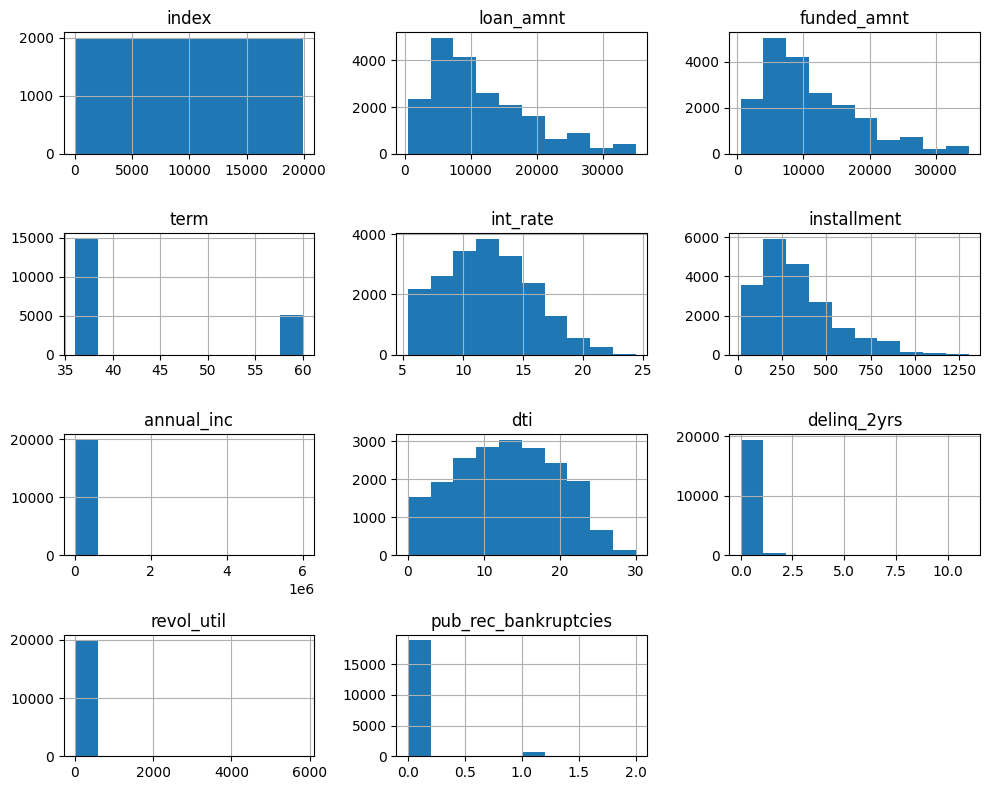

In [20]:
data[['index', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
      'revol_util', 'pub_rec_bankruptcies']].hist(figsize=(10, 8), bins=10)
plt.tight_layout()
plt.show()

Crearemos histogramas para las variables numéricas.

In [21]:
# Escribir el código

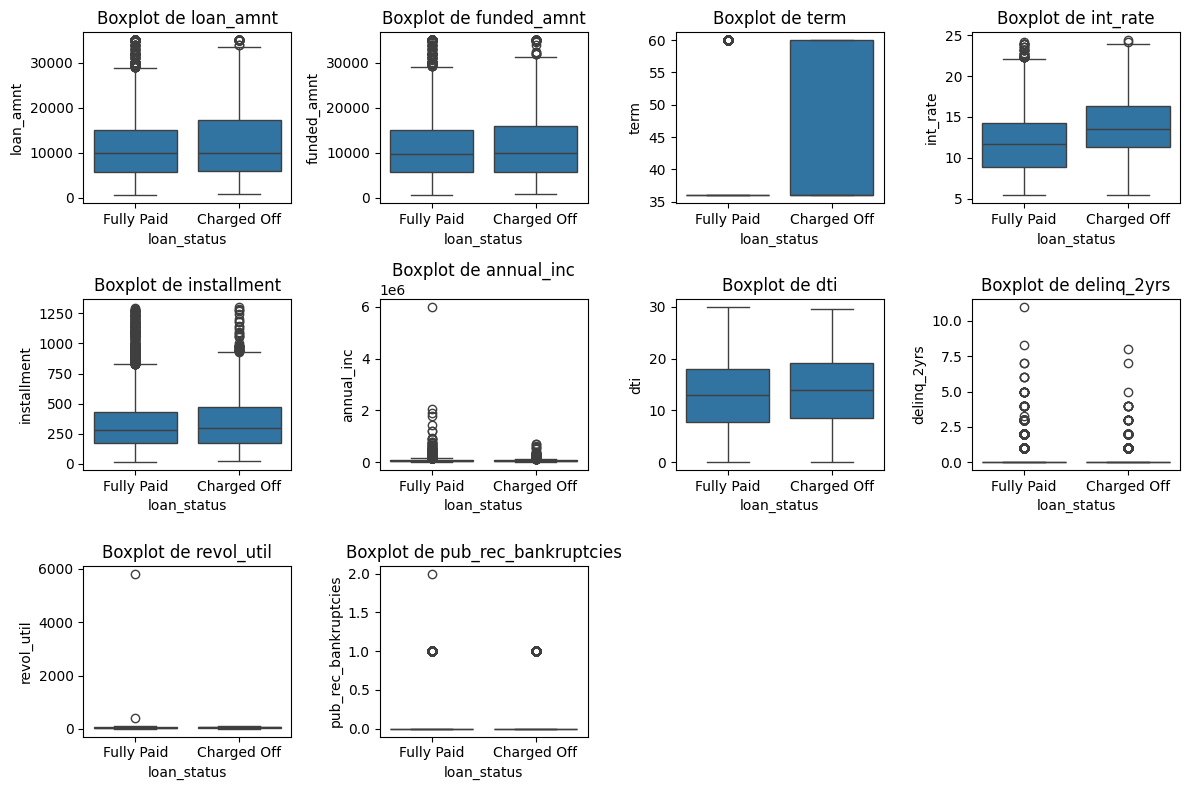

In [22]:
variables = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
      'revol_util', 'pub_rec_bankruptcies']

plt.figure(figsize=(12, 8))
for var in variables:
    plt.subplot(3, 4, variables.index(var) + 1)
    sns.boxplot(x='loan_status', y=var, data=data)
    plt.title(f'Boxplot de {var}')
    plt.xlabel('loan_status')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

In [23]:
# ¿ Qué podemos comentar de los siguientes gráficos de variables de Loan Term y Tasa de Interés?

```
# Completar la siguiente respuesta
```

- Hay aproximadamente ¿#? veces más préstamos a 36 meses que préstamos a 60 meses en el conjunto de datos.

- La tasa de interés está en el rango de ¿#?. La mayoría de los préstamos tienen una tasa de interés entre ¿#?.

- Los préstamos a 36 meses tienen una tasa de interés promedio significativamente ¿más baja o más alta? que la de los préstamos a 60 meses.



**Loan Term, Interest Rate, Annual Income**

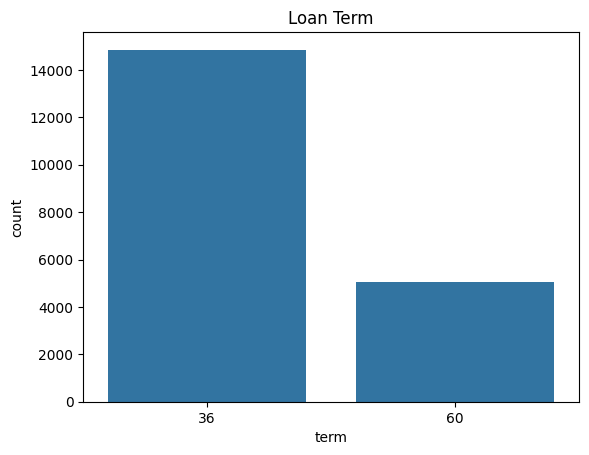

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=data, x='term', order=sorted(data['term'].unique()))
ax.set_title('Loan Term')

plt.show()

**Interest Rate**

<Axes: >

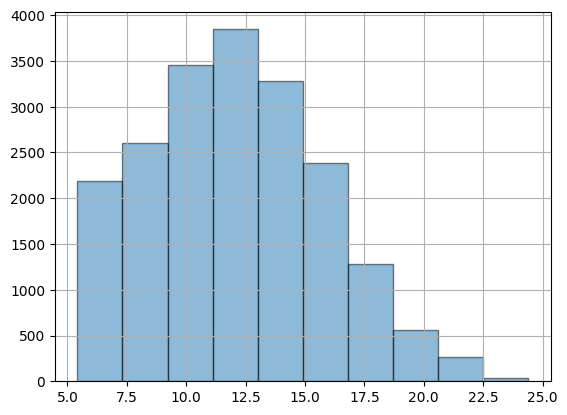

In [25]:
data.int_rate.hist(edgecolor='black', alpha=0.5)

**Tasa de Interés ('interest_rate') promedio de diferentes Plazos ('terms').**

In [26]:
data.groupby('term').agg({'int_rate':'mean'})

,int_rate
term,
36,11.121125
60,14.934955


In [27]:
# ¿ Qué podemos comentar de los siguientes gráficos de Loan Grade , etc.

```
# Escribir la respuesta
```

**Loan Grade**

In [28]:
grade_counts = data['grade'].value_counts()
grade_counts

grade
B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: count, dtype: int64

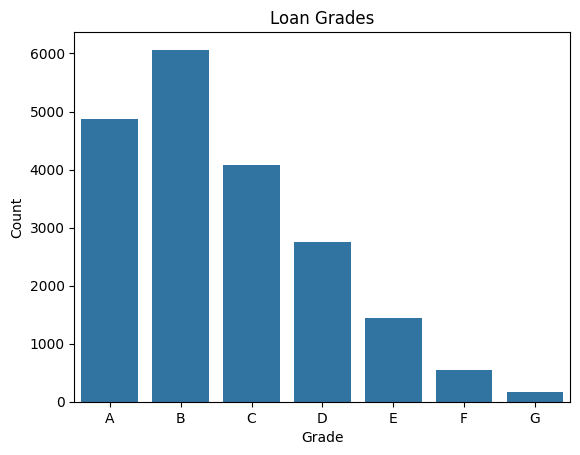

Number of different loan grades: 7


In [29]:
ax = sns.countplot(x='grade', data=data, order=sorted(data['grade'].unique()))

ax.set_title('Loan Grades')
ax.set_xlabel('Grade')
ax.set_ylabel('Count')

plt.show()

num_grades = len(grade_counts)
print("Number of different loan grades:", num_grades)

**Loan Grade and Interest Rate**

Obtenemos la tasa de interés promedio para cada 'grade'.

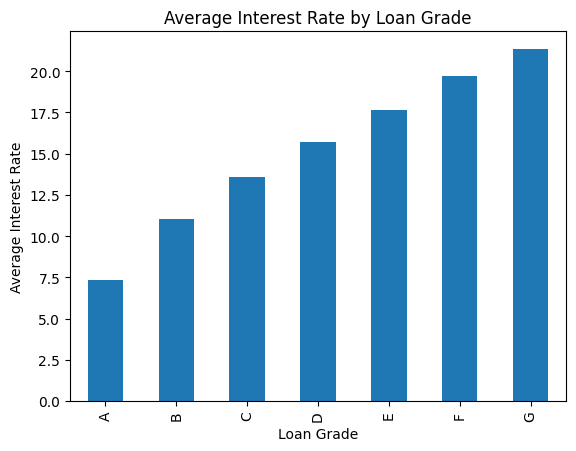

Average Interest Rate by Loan Grade:
grade
A     7.350978
B    11.033439
C    13.555241
D    15.707576
E    17.653752
F    19.729463
G    21.346981
Name: int_rate, dtype: float64


In [30]:
avg_int_rate = data.groupby('grade')['int_rate'].mean()

ax = avg_int_rate.plot(kind='bar')

ax.set_title('Average Interest Rate by Loan Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Average Interest Rate')

plt.show()

print("Average Interest Rate by Loan Grade:")
print(avg_int_rate)

Número de préstamos (Loan) por Estado (State)

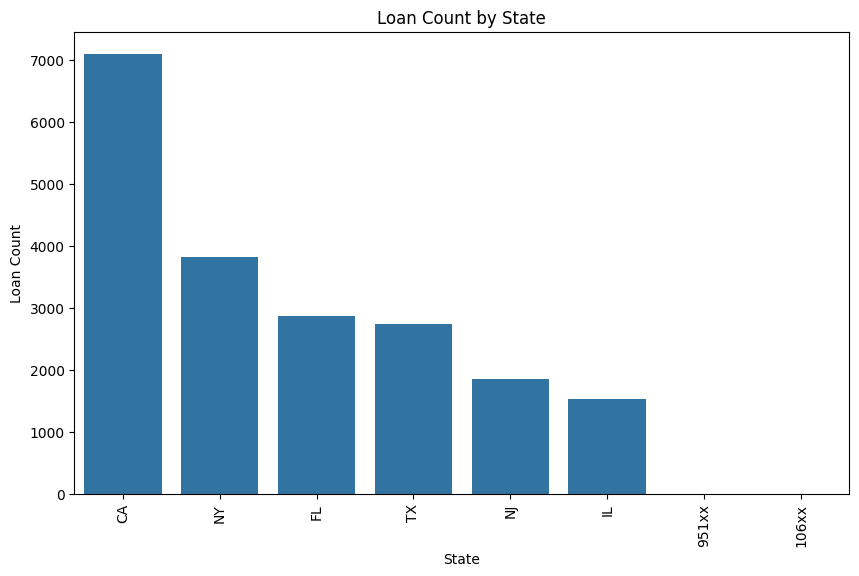

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

state_order = data['addr_state'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='addr_state', order=state_order)
plt.xlabel('State')
plt.ylabel('Loan Count')
plt.title('Loan Count by State')
plt.xticks(rotation=90)
plt.show()

**Distribución del Ingreso Anual**


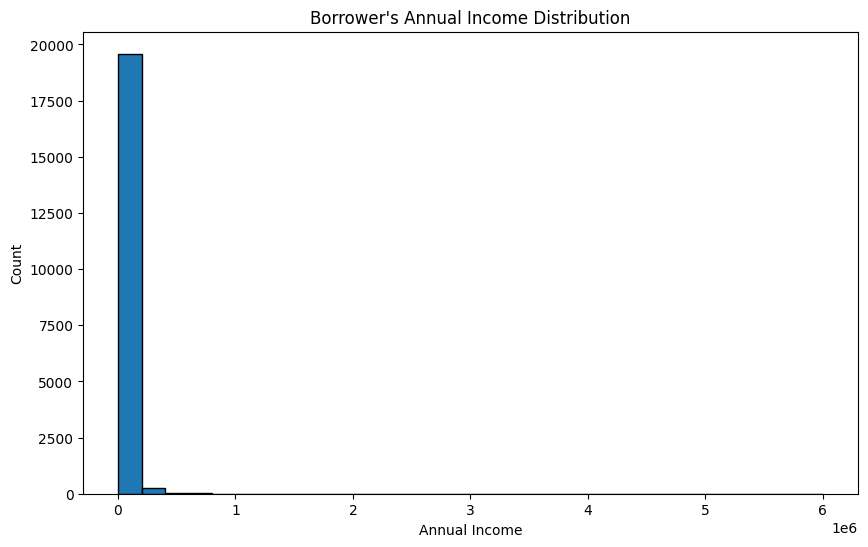

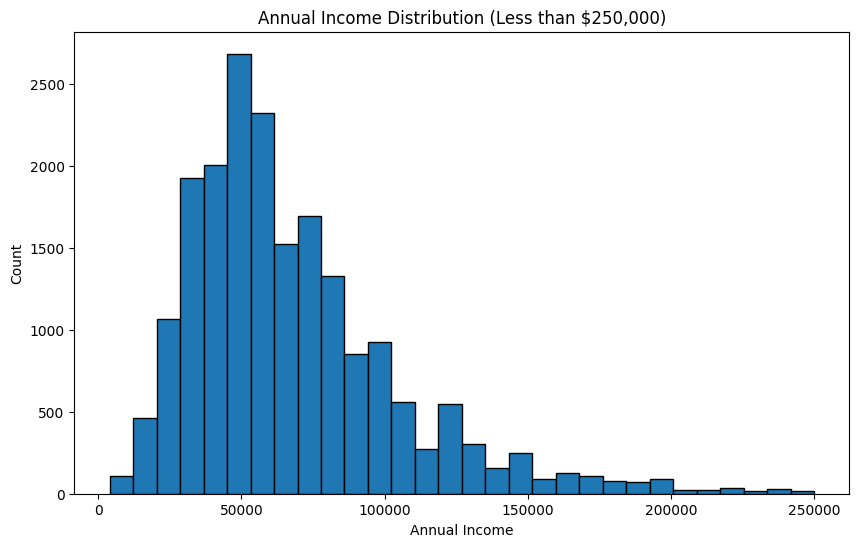

In [32]:
import matplotlib.pyplot as plt

# Plot histogram of all borrower's annual income
plt.figure(figsize=(10, 6))
plt.hist(data['annual_inc'], bins=30, edgecolor='black')
plt.title("Borrower's Annual Income Distribution")
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

# Plot histogram of annual income less than $250,000
plt.figure(figsize=(10, 6))
plt.hist(data[data['annual_inc'] < 250000]['annual_inc'], bins=30, edgecolor='black')
plt.title("Annual Income Distribution (Less than $250,000)")
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

**Ingreso Anual (annual_inc) Medio por Estado (State)**

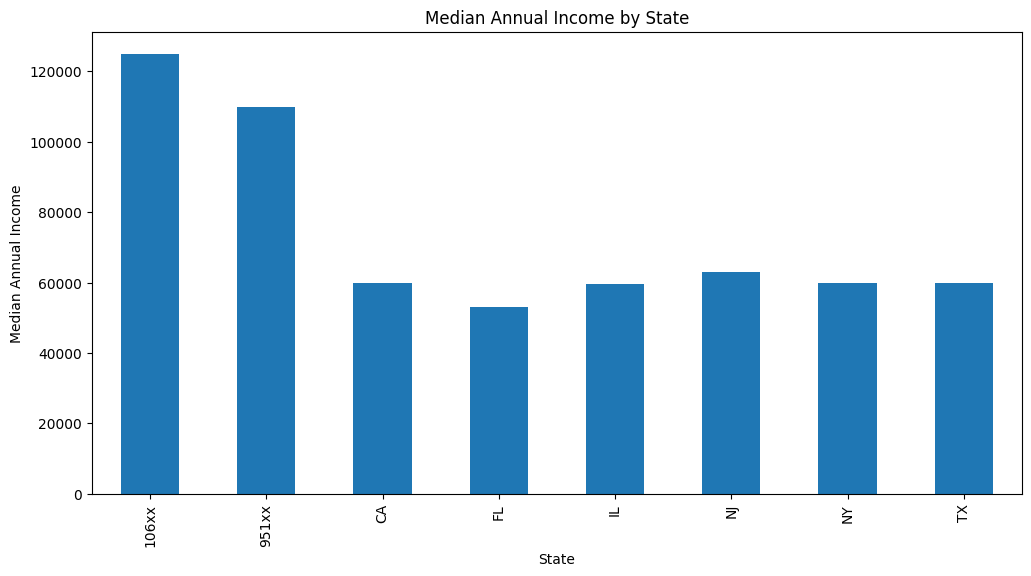

In [33]:
import matplotlib.pyplot as plt

# Group by addr_state and calculate median annual income
median_income_by_state = data.groupby('addr_state')['annual_inc'].median()

# Create a bar chart
ax = median_income_by_state.plot.bar(figsize=(12, 6))
ax.set_xlabel('State')
ax.set_ylabel('Median Annual Income')
ax.set_title('Median Annual Income by State')

# Rotate x-axis labels for better readability if needed
# plt.xticks(rotation=90)

plt.show()

**Ingreso Anual (annual_inc) por Tasa de Interés (interest_rate)**

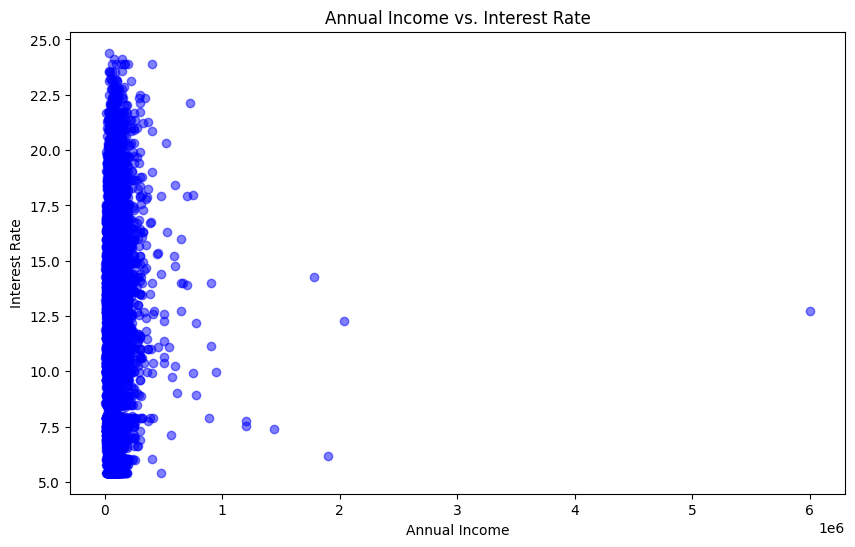

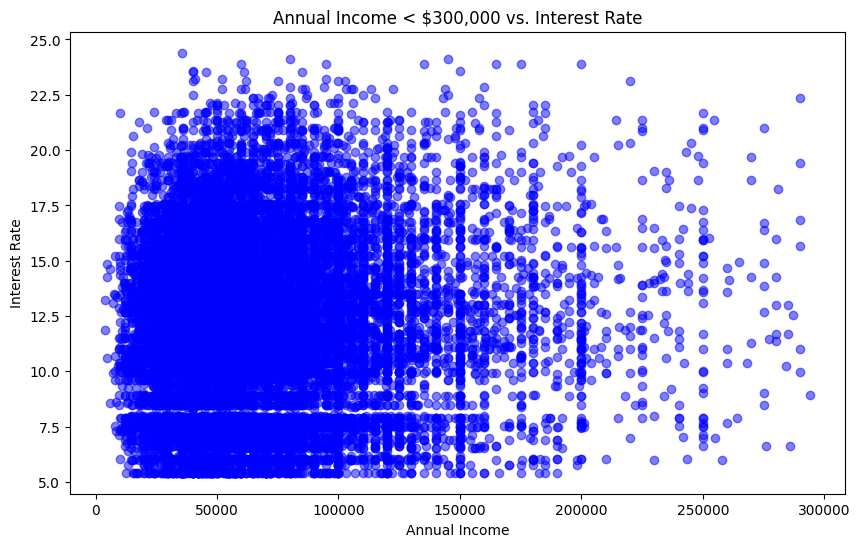

In [34]:
import matplotlib.pyplot as plt

# Plot scatter plot of annual income and interest rate
plt.figure(figsize=(10, 6))
plt.scatter(data['annual_inc'], data['int_rate'], color='blue', alpha=0.5)
plt.title('Annual Income vs. Interest Rate')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.show()

# Plot scatter plot of annual income less than $300,000 and interest rate
plt.figure(figsize=(10, 6))
plt.scatter(data[data['annual_inc'] < 300000]['annual_inc'], data[data['annual_inc'] < 300000]['int_rate'], color='blue', alpha=0.5)
plt.title('Annual Income < $300,000 vs. Interest Rate')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.show()


**Préstamos por año**



<ipython-input-35-59e057fb4ea5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year


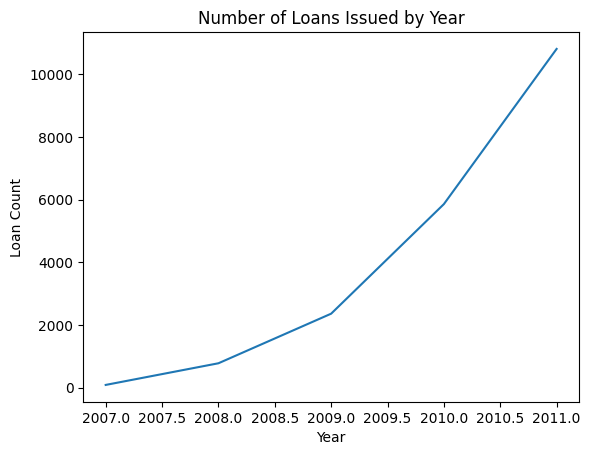

In [35]:
# Extract the year from the 'issue_d' column and create a new column 'issue_year'
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year

# Count the number of loans in each year
loan_count_by_year = data.groupby('issue_year').size()

# Plot a line chart to visualize the trend
ax = loan_count_by_year.plot.line()

# Set the title and labels for the plot
ax.set_title('Number of Loans Issued by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Loan Count')

# Show the plot
plt.show()

**Tasas de Interés por Año**



<Figure size 1000x600 with 0 Axes>

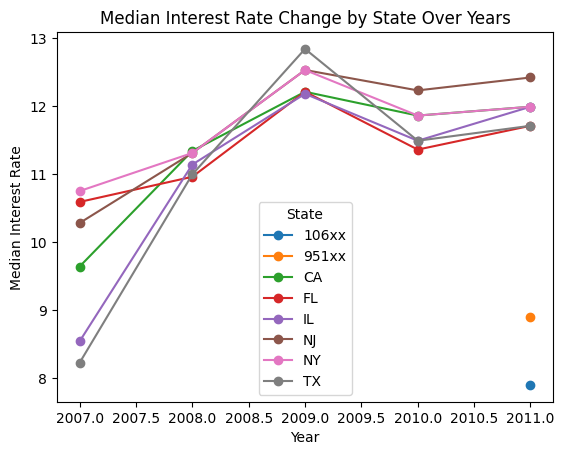

In [36]:
import matplotlib.pyplot as plt

# Create a pivot table with issue_year as index, addr_state as columns, int_rate as values, and median as aggfunc
pivot_table = data.pivot_table(index='issue_year', columns='addr_state', values='int_rate', aggfunc='median')

# Plot a line chart to compare median interest rate change over years of the 6 states
plt.figure(figsize=(10, 6))
pivot_table.plot.line(marker='o')
plt.title('Median Interest Rate Change by State Over Years')
plt.xlabel('Year')
plt.ylabel('Median Interest Rate')
plt.legend(title='State')
plt.show()

# 7. Feature Engineering

Modificaremos la variable 'target' para convertir las categorías a valores numéricos

In [37]:
data['loan_status'] = data['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})

Modificaremos la variable 'emp_length' para convertir las categorías a valores numéricos

In [38]:
# Definir un diccionario para mapear las categorías a valores numéricos
mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,
}

# Aplicar el mapeo a la variable 'emp_length'
data['emp_length_numeric'] = data['emp_length'].map(mapping)

Modificaremos el formato de la variable issue_d (de fecha, hora a año).

In [39]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['issue_year'] = data['issue_d'].dt.year
valores_unicos = data['issue_year'].unique()
print(valores_unicos)

[2011.   nan 2010. 2009. 2008. 2007.]


<ipython-input-39-9800bf065c7e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


Imprimiremos el conteo y porcentaje que representan los nulos.

In [40]:
# Obtener el número de valores nulos por columna
nulos_por_columna = data.isnull().sum()

# Calcular el porcentaje de nulos por columna
porcentaje_nulos_por_columna = (nulos_por_columna / len(data)) * 100

# Imprimir el número de nulos y el porcentaje de nulos por columna
for columna in data.columns:
    print(f"Columna: {columna}")
    print(f"Nulos: {nulos_por_columna[columna]}")
    print(f"Porcentaje de nulos: {porcentaje_nulos_por_columna[columna]:.2f}%")
    print()

Columna: index
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: loan_amnt
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: funded_amnt
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: term
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: int_rate
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: installment
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: grade
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: emp_title
Nulos: 1185
Porcentaje de nulos: 5.95%

Columna: emp_length
Nulos: 502
Porcentaje de nulos: 2.52%

Columna: home_ownership
Nulos: 3
Porcentaje de nulos: 0.02%

Columna: annual_inc
Nulos: 3
Porcentaje de nulos: 0.02%

Columna: verification_status
Nulos: 3
Porcentaje de nulos: 0.02%

Columna: issue_d
Nulos: 3
Porcentaje de nulos: 0.02%

Columna: loan_status
Nulos: 3
Porcentaje de nulos: 0.02%

Columna: pymnt_plan
Nulos: 0
Porcentaje de nulos: 0.00%

Columna: purpose
Nulos: 3
Porcentaje de nulos: 0.02%

Columna: addr_state
Nulos: 9
Porcentaje de nulos: 0.05%

Columna: dti
Nulos: 11
Porcentaje de

In [41]:
# ¿Qué tratamiento daría a las variables con valores nulos con una proporción mayor a 1%?

```
# Escribir la respuesta
```

In [42]:
# Escriba el código

Imprimiremos el conteo y porcentaje de NaN de las variables.

In [43]:
# Obtener el número de NaN por variable
nan_por_variable = data.isnull().sum()

# Calcular el porcentaje de NaN por variable
porcentaje_nan_por_variable = (nan_por_variable / len(data)) * 100

# Imprimir el número de NaN y el porcentaje de NaN por variable
for variable in data.columns:
    print(f"Variable: {variable}")
    print(f"Número de NaN: {nan_por_variable[variable]}")
    print(f"Porcentaje de NaN: {porcentaje_nan_por_variable[variable]:.2f}%")
    print()

Variable: index
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: loan_amnt
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: funded_amnt
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: term
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: int_rate
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: installment
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: grade
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: emp_title
Número de NaN: 1185
Porcentaje de NaN: 5.95%

Variable: emp_length
Número de NaN: 502
Porcentaje de NaN: 2.52%

Variable: home_ownership
Número de NaN: 3
Porcentaje de NaN: 0.02%

Variable: annual_inc
Número de NaN: 3
Porcentaje de NaN: 0.02%

Variable: verification_status
Número de NaN: 3
Porcentaje de NaN: 0.02%

Variable: issue_d
Número de NaN: 3
Porcentaje de NaN: 0.02%

Variable: loan_status
Número de NaN: 3
Porcentaje de NaN: 0.02%

Variable: pymnt_plan
Número de NaN: 0
Porcentaje de NaN: 0.00%

Variable: purpose
Número de NaN: 3
Porcent

Identificaremos las variables con valores NaN para tratarlas.

In [44]:
variables_con_nan = data.columns[data.isna().any()].tolist()
print("Variables con valores NaN:")
print(variables_con_nan)

Variables con valores NaN:
['emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'revol_util', 'pub_rec_bankruptcies', 'issue_year', 'emp_length_numeric']


In [45]:
data = data.fillna(data.median(numeric_only=True))
data.head()

,index,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,revol_util,application_type,pub_rec_bankruptcies,issue_year,emp_length_numeric
0,1,2400,2400,36,15.96,84.33,C,NaN,10+ years,RENT,...,s,small_business,IL,8.72,0.0,98.5,Individual,0.0,2011.0,10.0
1,2,10000,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,s,other,CA,20.00,0.0,21.0,Individual,0.0,2011.0,10.0
2,3,3000,3000,36,18.64,109.43,E,MKC Accounting,9 years,RENT,...,s,car,CA,5.35,0.0,87.5,Individual,0.0,2011.0,9.0
3,4,5600,5600,60,21.28,152.39,F,NaN,4 years,OWN,...,s,small_business,CA,5.55,0.0,32.6,Individual,0.0,2011.0,4.0
4,5,5375,5375,60,12.69,121.45,B,Starbucks,< 1 year,RENT,...,s,other,TX,18.08,0.0,36.5,Individual,0.0,2011.0,0.0


Dummies

In [46]:
# ¿Qué variables transformaría a dummies?

In [47]:
# Escribir el código

In [48]:
# Seleccionar las columnas categóricas para aplicar get_dummies
categorical_columns = ['grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'addr_state']

# Aplicar get_dummies a las columnas categóricas
data = pd.get_dummies(data, columns=categorical_columns)

# Imprimir la base de datos resultante
data.head()

,index,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,issue_d,...,application_type_1,application_type_Individual,addr_state_106xx,addr_state_951xx,addr_state_CA,addr_state_FL,addr_state_IL,addr_state_NJ,addr_state_NY,addr_state_TX
0,1,2400,2400,36,15.96,84.33,NaN,10+ years,12252.0,2011-12-01,...,False,True,False,False,False,False,True,False,False,False
1,2,10000,10000,36,13.49,339.31,AIR RESOURCES BOARD,10+ years,49200.0,2011-12-01,...,False,True,False,False,True,False,False,False,False,False
2,3,3000,3000,36,18.64,109.43,MKC Accounting,9 years,48000.0,2011-12-01,...,False,True,False,False,True,False,False,False,False,False
3,4,5600,5600,60,21.28,152.39,NaN,4 years,40000.0,2011-12-01,...,False,True,False,False,True,False,False,False,False,False
4,5,5375,5375,60,12.69,121.45,Starbucks,< 1 year,15000.0,2011-12-01,...,False,True,False,False,False,False,False,False,False,True


In [49]:
# Elimine las variables que considere necesarias.

In [50]:
# Escribir el código

In [51]:
#variables=['index', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'application_type']
#data = data.drop(variables, axis=1)

variables=['index', 'emp_title', 'emp_length', 'issue_d', 'pymnt_plan']
data = data.drop(variables, axis=1)

Comprobamos las variables numéricas y categóricas de nuestra base de datos antes de realizar el split en train y test

In [52]:
# Variables numericas y categoricas
numericas = data.select_dtypes(include='number')
categoricas = data.select_dtypes(include=['object','category'])

In [53]:
numericas.columns.values

array(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'revol_util',
       'pub_rec_bankruptcies', 'issue_year', 'emp_length_numeric'],
      dtype=object)

In [54]:
categoricas.columns.values

array([], dtype=object)

# 8. Train y Test



Nos aseguramos de que no hayan variables de tipo string ni que incluyan valores Nan.

In [55]:
variables_string = data.select_dtypes(include='object').columns
print(variables_string)

Index([], dtype='object')


In [56]:
variables_con_nan = data.columns[data.isna().any()].tolist()
print("Variables con valores NaN:")
print(variables_con_nan)

Variables con valores NaN:
[]


Dividiremos la base de datos en train y test () considerando una partición 80/20.

In [57]:
# Escribir el código
# (De preferencia considerar como nombres de los datasets X_train, X_test, y_train, y_test)

In [58]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print('Forma de X_train:', X_train.shape)
print('Forma de y_train:', y_train.shape)
print('Forma de X_test:', X_test.shape)
print('Forma de y_test:', y_test.shape)

Forma de X_train: (15926, 51)
Forma de y_train: (15926,)
Forma de X_test: (3982, 51)
Forma de y_test: (3982,)


In [59]:
# ¿Para que se mantengan las muestras de train y test en una próxima ejecución del código que argumento dentro de la función train_test_split se debe considerar?

```
# Escribir la respuesta
```


In [60]:
X_train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,...,application_type_1,application_type_Individual,addr_state_106xx,addr_state_951xx,addr_state_CA,addr_state_FL,addr_state_IL,addr_state_NJ,addr_state_NY,addr_state_TX
8665,5200,5200,36,9.63,166.89,98000.0,19.80,0.0,70.3,0.0,...,False,True,False,False,True,False,False,False,False,False
16865,12500,12500,36,11.48,412.11,65000.0,1.63,0.0,36.4,0.0,...,False,True,False,False,True,False,False,False,False,False
4031,7000,7000,36,11.49,230.80,72000.0,18.30,0.0,61.5,0.0,...,False,True,False,False,True,False,False,False,False,False
11508,20000,12150,36,6.54,372.61,62000.0,18.02,0.0,39.1,0.0,...,False,True,False,False,False,False,False,False,True,False
14922,9600,9600,60,16.82,237.66,46095.0,12.86,0.0,86.5,1.0,...,False,True,False,False,False,False,True,False,False,False


In [61]:
y_train.head()

8665     0.0
16865    0.0
4031     0.0
11508    0.0
14922    1.0
Name: loan_status, dtype: float64

# 9. Ajustar un árbol de decisión

Empezaremos a construir nuestro clasificador.

Iniciaremos ajustando un **decisión tree** con una profundidad (depth) de 5 niveles para tenerlo como referencia a nivel de métricas y contar con una representación gráfica. Luego ajustaremos un random forest.

In [62]:
# Escribir el código

[Text(0.5360169491525424, 0.9166666666666666, 'int_rate <= 14.86\ngini = 0.25\nsamples = 15926\nvalue = [13593, 2333]'),
 Text(0.2711864406779661, 0.75, 'int_rate <= 9.995\ngini = 0.206\nsamples = 12317\nvalue = [10881, 1436]'),
 Text(0.13559322033898305, 0.5833333333333334, 'annual_inc <= 58848.0\ngini = 0.13\nsamples = 4731\nvalue = [4400, 331]'),
 Text(0.06779661016949153, 0.4166666666666667, 'annual_inc <= 13098.0\ngini = 0.175\nsamples = 2309\nvalue = [2085, 224]'),
 Text(0.03389830508474576, 0.25, 'revol_util <= 31.7\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.01694915254237288, 0.08333333333333333, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.05084745762711865, 0.08333333333333333, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.1016949152542373, 0.25, 'loan_amnt <= 30500.0\ngini = 0.17\nsamples = 2278\nvalue = [2064, 214]'),
 Text(0.0847457627118644, 0.08333333333333333, 'gini = 0.17\nsamples = 2277\nvalue = [2064, 213]'),
 Text(0.1186440677966101

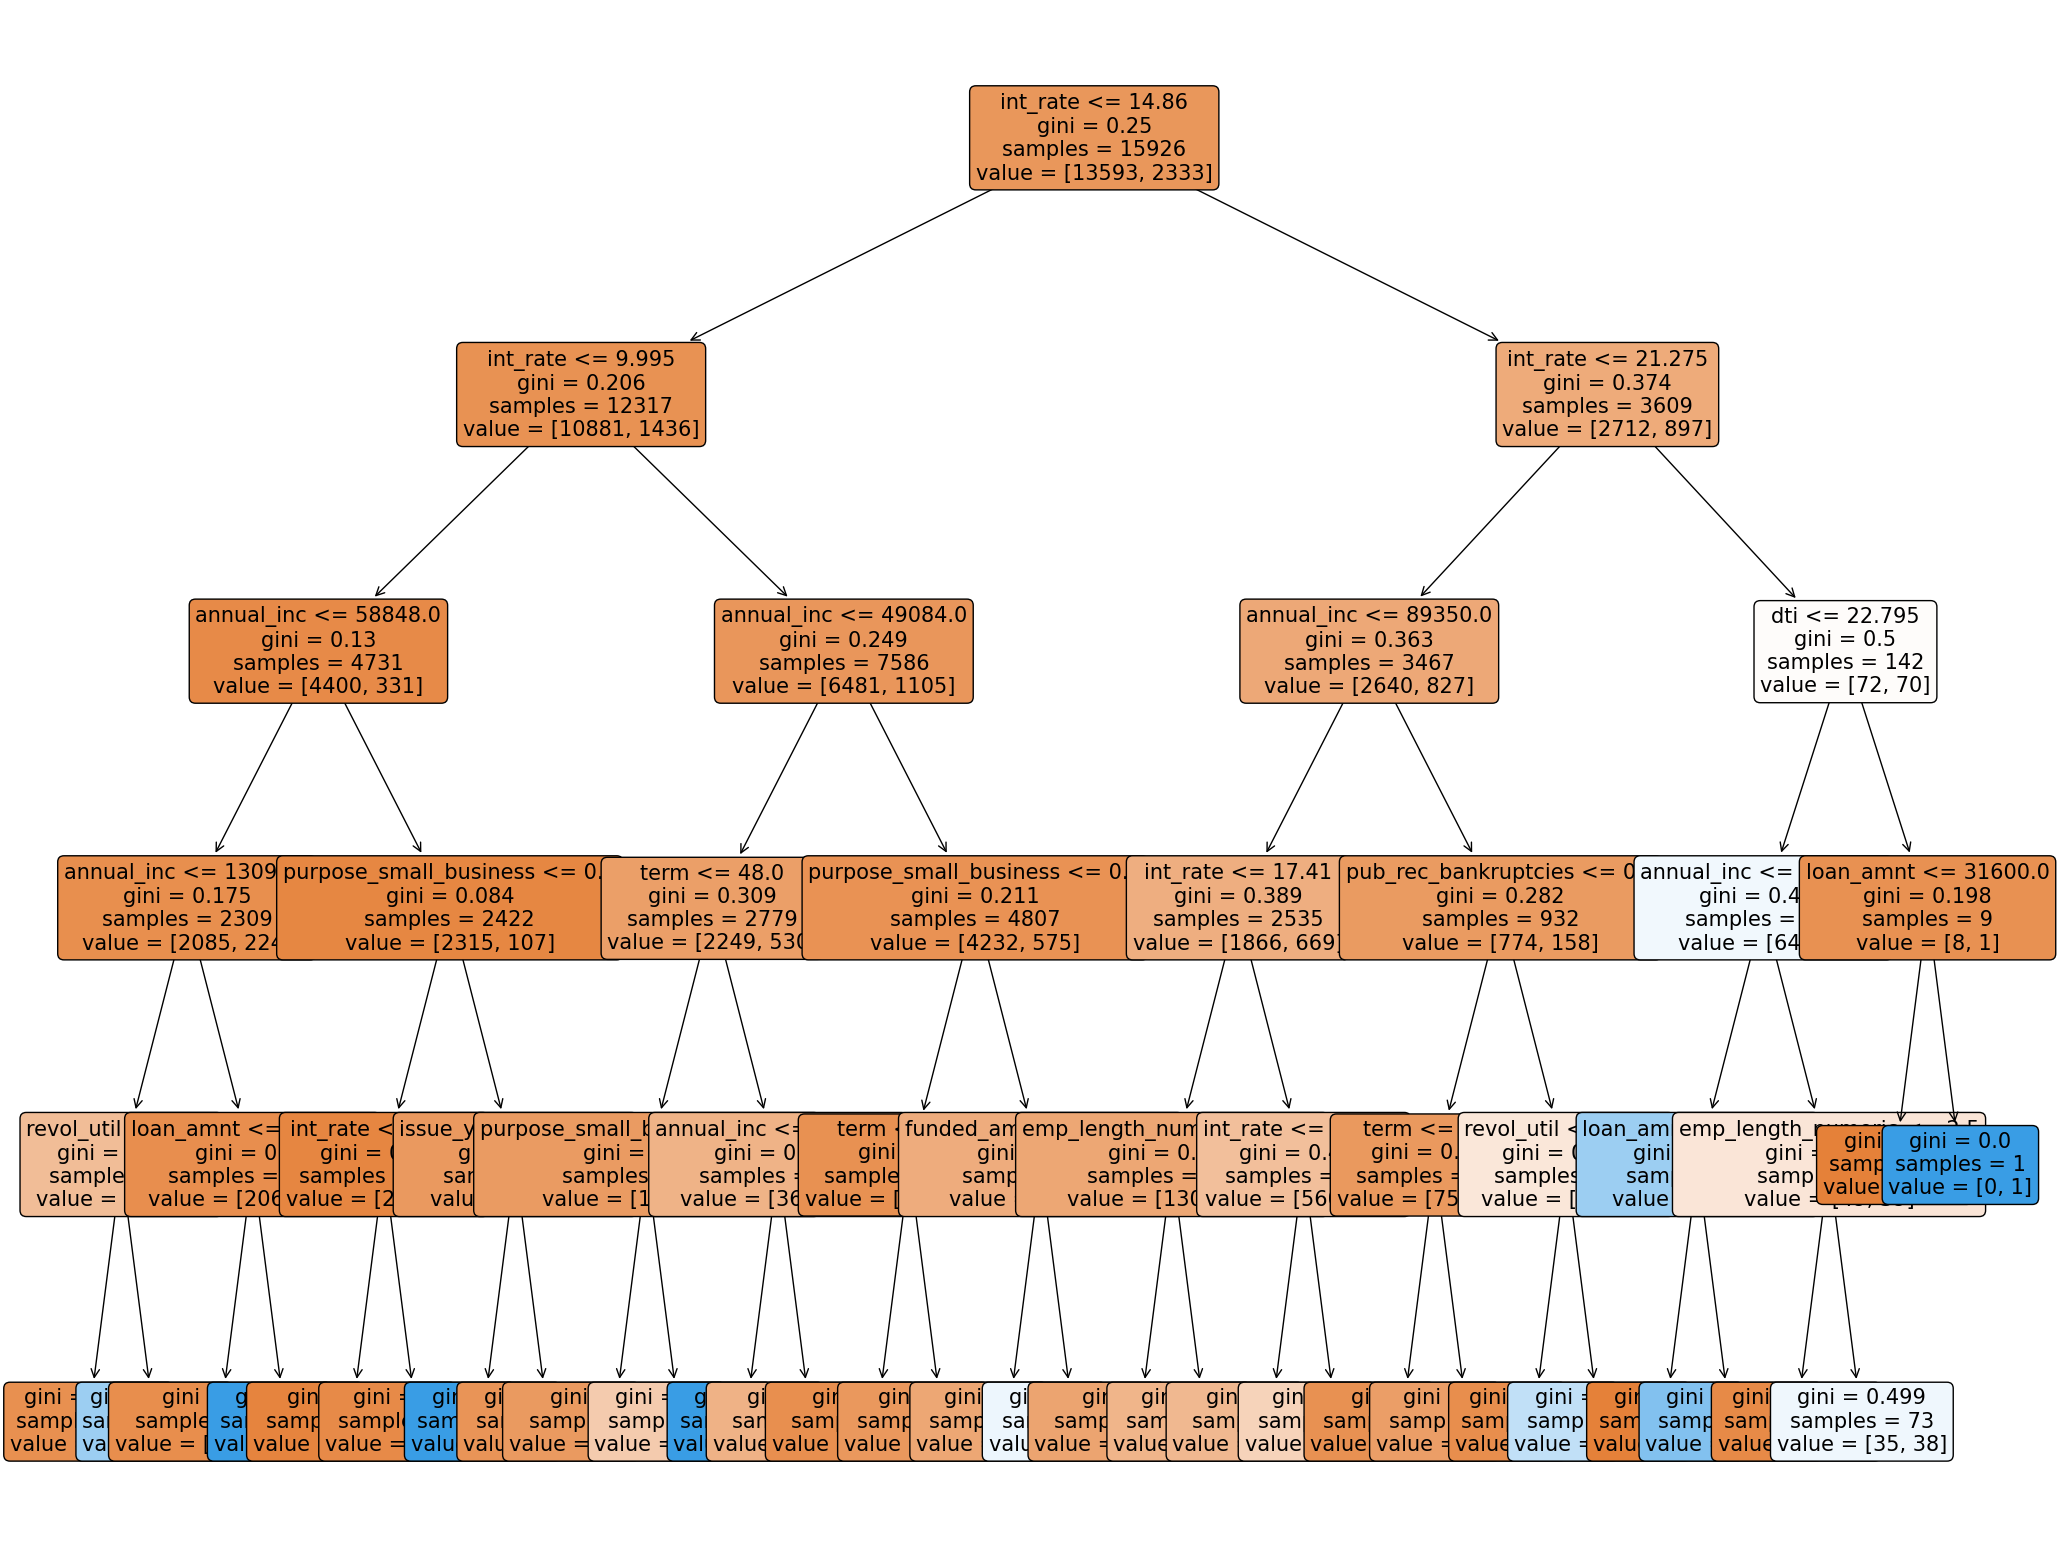

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(25,20))

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1812)
tree_clf.fit(X_train, y_train)

tree.plot_tree(tree_clf,max_depth=5, feature_names=X_train.columns,filled=True, rounded=True,  fontsize=15)

In [64]:
from sklearn import tree
import graphviz

# Export the decision tree to Graphviz format
dot_data = tree.export_graphviz(tree_clf, out_file=None,
                                feature_names=X_train.columns.tolist(),
                                filled=True, rounded=True,
                                special_characters=True)

# Create a graph from the Graphviz data
graph = graphviz.Source(dot_data)

# Display the decision tree
graph.view()

'Source.gv.pdf'

Explicaremos la primera división que realiza el árbol (en el nodo raíz) con la información extraída de la gráfica.

```
# Escribir la respuesta
```

¿En las hojas finales del árbol de decision podemos encontrar hojas puras ? ¿Cómo las identificamos?

```
# Escribir la respuesta
```



Calcularemos las métricas de clasificación del modelo (matriz de confusión).




In [65]:
# Escribir el código

In [66]:
print(f'Accuracy on training set: {tree_clf.score(X_train, y_train)}')
print(f'Accuracy on test set: {tree_clf.score(X_test, y_test)}')

Accuracy on training set: 0.8560215998995353
Accuracy on test set: 0.8412857860371673


In [67]:
# test: (X): variables independientes o features
# test: (y): variable dependiente o target
# pred_tree: pred_tree: predice la clase y para cada los valores X

pred_tree = tree_clf.predict(X_test)
confusion = confusion_matrix(y_test, pred_tree)
print(f'Confusion matrix:\n {confusion}')

Confusion matrix:
 [[3336   36]
 [ 596   14]]


¿En el análisis del modelo preferimos la métrica AUC o alguna métrica de la matriz de confusión?



```
# Escribir la respuesta
```



# 10. Ajustar un random forest
Los árboles de decisión son inestables y sensibles a pequeñas variaciones en los datos. Por lo tanto, tiene sentido ajustar un algoritmo random forest que promedia varios árboles de decisión. Esto debería darnos un modelo más robusto.

In [68]:
# Considere el siguiente diccionario de hiperparámetros y un cv = 5.
# {'n_estimators':[150,200,250],'max_leaf_nodes':[12,14,16],'max_features':[5,6,7]}

````
* n_estimators: número de árboles en el bosque
* max_leaf_nodes:controla el número máximo de nodos hoja.
* max_features: controla el máximo de características seleccionadas aleatoriamente a ser evaluadas en cada división.

````

¿Cuántas ejecuciones obtendremos?

```

Para calcular el número total de combinaciones de hiperparámetros en un proceso de Grid Search, multiplicamos la cantidad de alternativas para cada hiperparámetro.

n_estimators: 150, 200, 250)
max_leaf_nodes: (12, 14, 16)
max_features: (5, 6, 7)

3×3×3 = 27 combinaciones

Además, como cada combinación considera validación cruzada con 5 folds (cv = 5), cada combinación se ejecutará 5 veces.

27 combinaciones× 5 folds = 135 entrenamientos

```

````


¿recuerdan el cross validation?


````

````

recordando el cross validation:

* Datos: El conjunto de datos completo se divide en 5 partes iguales, o "folds".
Cada fold es una representación del conjunto total, intentamos mantener la misma proporción de categorías en cada fold que en el conjunto de datos completo.

* Ciclos de Entrenamiento y Validación:
1: Entrenamos el modelo en los folds 2, 3, 4 y 5, y se valida en el fold 1.
2: Entrenamos el modelo en los folds 1, 3, 4 y 5, y se valida en el fold 2.
3: Entrenamos el modelo en los folds 1, 2, 4 y 5, y se valida en el fold 3.
4: Entrenamos el modelo en los folds 1, 2, 3 y 5, y se valida en el fold 4.
5: Entrenamos el modelo en los folds 1, 2, 3 y 4, y se valida en el fold 5.

* Cálculo de la Precisión:
Evaluamos el fold de validación usando una métrica de precisión (la proporción de predicciones correctas sobre el total de casos)
Entonces, obtenemos una precisión para cada una de las 5 iteraciones.

* Promedio de las Precisiones:
Las precisiones obtenidas de cada uno de los 5 folds se promedian para obtener una única medida de precisión o performance del modelo.
````

In [69]:
# Escribir el código

In [70]:
# Random Forest incluyendo grid search y cross validation (ejemplo)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rnd = RandomForestClassifier(random_state=1812)

## dicionario de hiperparámetros
param_grid_rnd = {'n_estimators':[150,200,250],
             'max_leaf_nodes':[12,14,16], #
              'max_features':[5,6,7]} #

## implementación de grid search
grid_search_rnd = GridSearchCV(rnd,param_grid_rnd,cv=5,return_train_score=True)
grid_search_rnd.fit(X_train,y_train)

print(f'Grid Search CV train set score: {grid_search_rnd.score(X_train,y_train)}')
print(f'Grid Search CV test set score: {grid_search_rnd.score(X_test,y_test)}')
print(f'Grid Search CV best parameters: {grid_search_rnd.best_params_}')

print(f'Grid Search CV best cross-validation score: {grid_search_rnd.best_score_}')
print(f'Grid Search CV best estimator: {grid_search_rnd.best_estimator_}')

Grid Search CV train set score: 0.8535099836744945
Grid Search CV test set score: 0.8468106479156203
Grid Search CV best parameters: {'max_features': 5, 'max_leaf_nodes': 12, 'n_estimators': 150}
Grid Search CV best cross-validation score: 0.853509989248488
Grid Search CV best estimator: RandomForestClassifier(max_features=5, max_leaf_nodes=12, n_estimators=150,
                       random_state=1812)


In [71]:
rnd = RandomForestClassifier(n_estimators=150, max_features=5, max_leaf_nodes=12, random_state=1812)
rnd.fit(X_train, y_train)

RandomForestClassifier(max_features=5, max_leaf_nodes=12, n_estimators=150,
                       random_state=1812)

Trazaremos las curvas ROC para el árbol de decisión y el random forest e impriremos las métricas de la matriz de confusión.


In [72]:
# Escribir el código

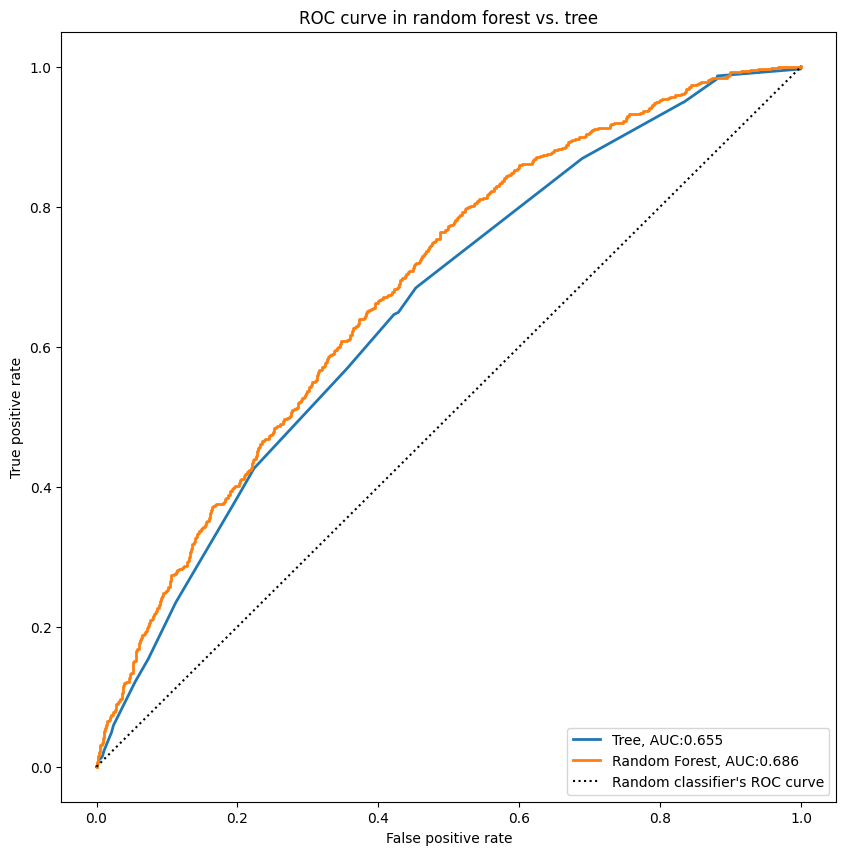

In [73]:
# importamos las bibliotecas necesarias para métricas y gráficos
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# calculamos las probabilidades de clase para cada registro del conjunto de prueba
proba_tree = tree_clf.predict_proba(X_test)[:,1]
# Probabilidades para la clase 1 del clasificador de árbol
proba_rndfor = rnd.predict_proba(X_test)[:,1]
# Probabilidades para la clase 1 del clasificador de bosque aleatorio
# proba_grid_rnd = grid_search_rnd.predict_proba(X_test)[:,1]

# construimos la curva ROC que necesita los valores reales y las probabilidades de las predicciones
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, proba_tree)
# Curva ROC para el clasificador de árbol
fpr_rndfor, tpr_rndfor, thresholds_rndfor = roc_curve(y_test, proba_rndfor)
# Curva ROC para el bosque aleatorio
# fpr_grid_for, tpr_grid_for, thresholds_grid_for = roc_curve(y_test, proba_grid_rnd)

# configuramos el gráfico de la curva ROC
plt.figure(figsize=(10,10))  # Definimos el tamaño del gráfico

# graficamos las curvas ROC para cada modelo
plt.plot(fpr_tree, tpr_tree, linewidth=2, label=f"Tree, AUC:{round(metrics.roc_auc_score(y_test, proba_tree),3)}")
plt.plot(fpr_rndfor, tpr_rndfor, linewidth=2, label=f"Random Forest, AUC:{round(metrics.roc_auc_score(y_test, proba_rndfor),3)}")
# plt.plot(fpr_grid_for, tpr_grid_for, linewidth=2, label=f"Random Forest Grid Search, AUC:{round(metrics.roc_auc_score(y_test, proba_grid_rnd),3)}")  # Curva ROC para el modelo optimizado

# graficamos la línea diagonal, que representa el rendimiento de un clasificador aleatorio
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")  # Curva ROC para un clasificador aleatorio

# etiquetamos y titulamos el gráfico
plt.xlabel('False positive rate')  # eje x
plt.ylabel('True positive rate')  # eje y
plt.title('ROC curve in random forest vs. tree')  # gráfico
plt.legend(loc=4)  # leyenda en el gráfico

In [74]:
confusion_1 = confusion_matrix(y_test, tree_clf.predict(X_test))
confusion_2 = confusion_matrix(y_test, rnd.predict(X_test))

print(f'Confusion matrix of the decision tree:\n {confusion_1}')
print(f'Confusion matrix of the random forest:\n {confusion_2}')

Confusion matrix of the decision tree:
 [[3336   36]
 [ 596   14]]
Confusion matrix of the random forest:
 [[3372    0]
 [ 610    0]]


In [75]:
conteo_loan_status = y_test.value_counts()
print(conteo_loan_status)

loan_status
0.0    3372
1.0     610
Name: count, dtype: int64


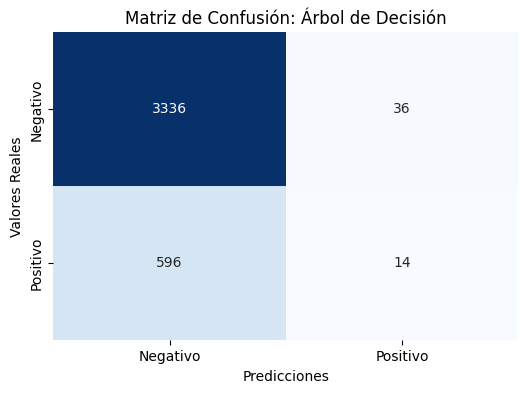

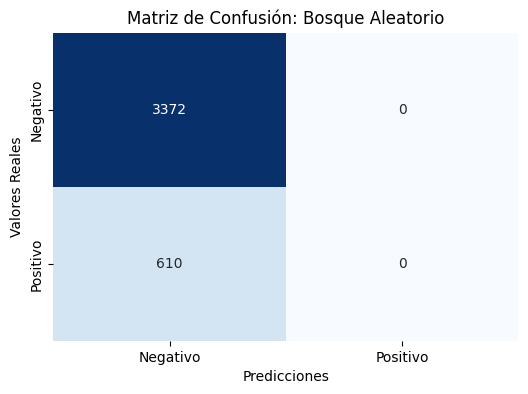

In [76]:
# código alternativo para la generación de las matrices de confusión

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

confusion_1 = confusion_matrix(y_test, tree_clf.predict(X_test))
confusion_2 = confusion_matrix(y_test, rnd.predict(X_test))

# elaboramos una función para graficar la matriz de confusión con etiquetas
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=['Negativo', 'Positivo']):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title(title)
    plt.show()

# llamamos a la función
plot_confusion_matrix(confusion_1, title='Matriz de Confusión: Árbol de Decisión')
plot_confusion_matrix(confusion_2, title='Matriz de Confusión: Bosque Aleatorio')

¿Cuál modelo es el modelo con mejor performance? ¿el obtenido con el algoritmo decision tree o el obtenido con el algoritmo random forest? (tener en cuenta lo que se observa en las curvas ROC).


In [77]:
# ¿Cuál modelo es el modelo con mejor performance? ¿el obtenido con el algoritmo decision tree o el obtenido con el algoritmo random forest? (tener en cuenta lo que se observa en las curvas ROC).

```

El modelo de random forest con un AUC de 0.686 presenta un mejor performance en comparación con el Árbol de Decisión, que tiene un AUC de 0.655.

El árbol de decisión ha logrado identificar algunos casos positivos, pero tiene errores tanto en falsos positivos como en falsos negativos.
El random forest, aunque no cometió errores en los casos negativos, no logró identificar ningún caso positivo.

```

In [78]:
# ¿Por qué no debemos considerar un modelo con una curva ROC por debajo de la diagonal?

```
# Escribir la respuesta
```

In [79]:
#¿Qué resultado devuelve el método predict_proba?

```
 Devuelve un array con las probabilidades de cada clase para cada instancia /fila en el conjunto de test.

 Cada columna a una clase.
 * La primera columna ([:,0]) contiene las probabilidades de la clase "0"
 * La segunda columna ([:,1]) contiene las probabilidades de la clase "1".

[:,1]: Esta sintaxis se utiliza para seleccionar todas las filas del array y la segunda columna, que contiene las probabilidades de que las instancias pertenezcan a la clase "1"

```

#11. Importancia de variables

Evaluaremos la importancia de las variables en ambos modelos decisión tree y random forest.

In [80]:
# Escribir el código

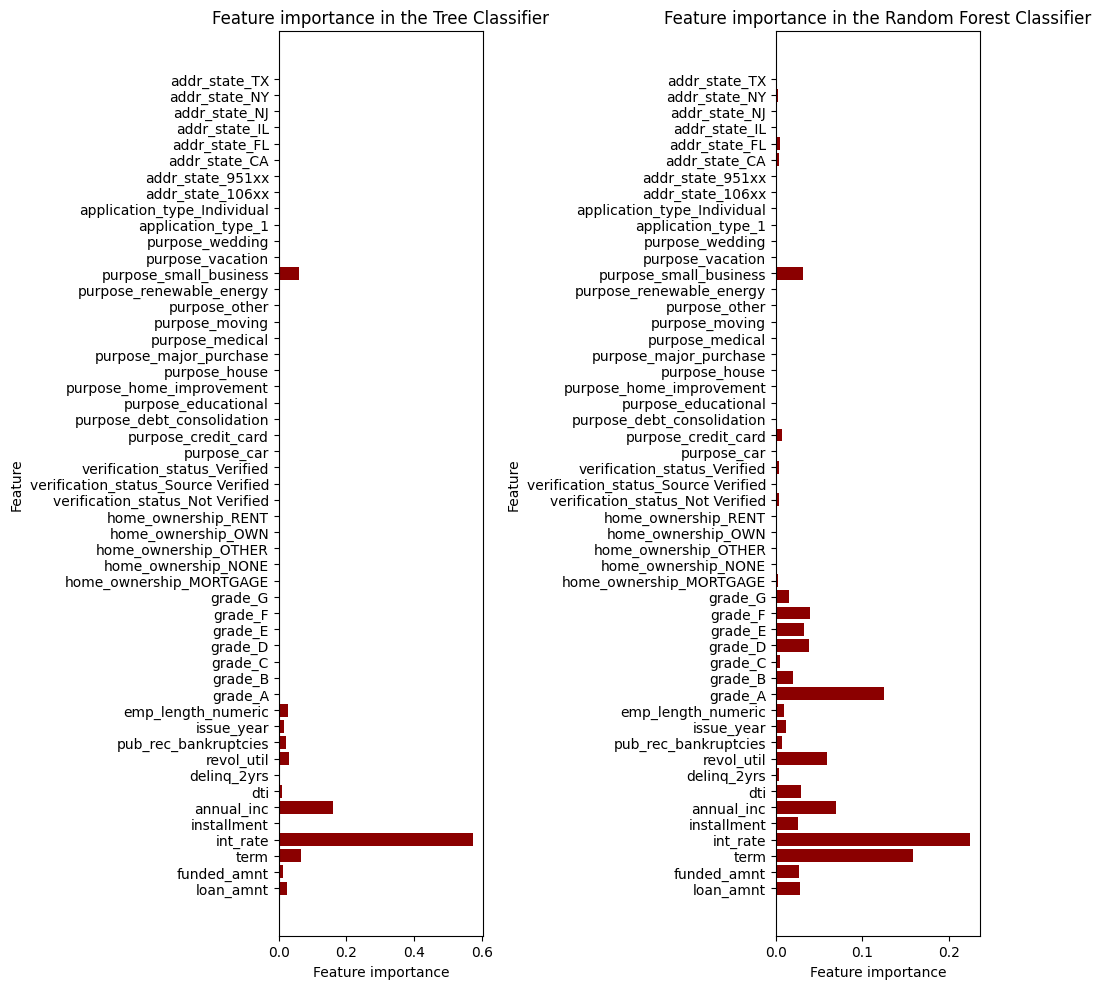

In [81]:
import matplotlib.pyplot as plt

# a partir del DataFrame de entrada X, que contiene las características,
# obtenemos los nombres de las características
feature_names = list(X.columns)

# definimos el tamaño del gráfico
plt.figure(figsize=(10,10))

# primer subplot para el árbol de decisión
plt.subplot(1,2,1)
# gráfico de barras horizontales asociadas características
# 'tree_clf.feature_importances_' ----> corresponde a las importancias de las variables o características
plt.barh(feature_names, tree_clf.feature_importances_, color='darkred')
# etiquetas
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance in the Tree Classifier')

# segundo subplot para el bosque aleatorio
plt.subplot(1,2,2)
plt.barh(feature_names, rnd.feature_importances_, color='darkred')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance in the Random Forest Classifier')

# ajustamos los gráficos para que no se superpongan
plt.tight_layout()
plt.show()

# 12. Evaluar otros algoritmos de clasificación

Agregaremos los algoritmos de logistic regression y support vector machine.

In [82]:
# Escribir el código

In [83]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay

SVC_clf = SVC(random_state=1812,degree=7)
SVC_clf.fit(X_train, y_train)

LogReg_clf = LogisticRegression(random_state=1812)
LogReg_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1812)

Trazaremos las curvas ROC para ambos modelos e imprimimos las métricas de la matriz de confusión.

In [84]:
#RocCurveDisplay: requiere tres argumentos:
# 1) el algoritmo de estimación: SVC_clf (ejemplo)
# 2) X_test:
# 3) y_test:

In [85]:
# Escribir el código

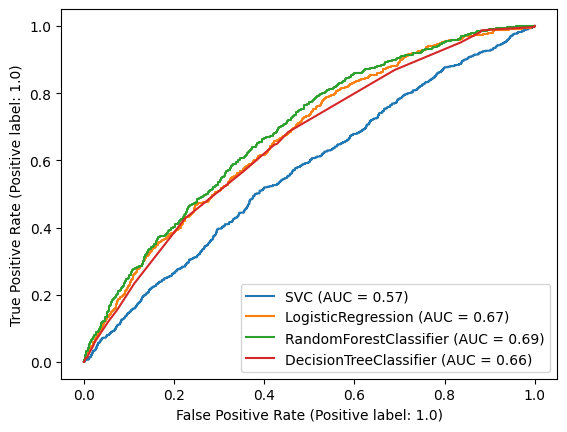

In [86]:

roc_SVC = metrics.RocCurveDisplay.from_estimator(SVC_clf, X_test, y_test)
metrics.RocCurveDisplay.from_estimator(LogReg_clf, X_test, y_test, ax = roc_SVC.ax_)
metrics.RocCurveDisplay.from_estimator(rnd, X_test, y_test, ax = roc_SVC.ax_)
metrics.RocCurveDisplay.from_estimator(tree_clf, X_test, y_test, ax = roc_SVC.ax_)


# 13. Evaluar otros métodos de ensamble
Combinaremos los modelos estimados anteriores (random forest, logistic regression, support vector machine) para obtener una mejor predicción.

In [87]:
# Escribir el código

In [88]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

ensemble_clf = VotingClassifier(estimators=[
    ('LogReg', LogisticRegression(random_state=1812,max_iter=10000)),
    ('RanFor', RandomForestClassifier(n_estimators=150, max_features=5, max_leaf_nodes=12, random_state=1812)),
    ('SVC', SVC(random_state=1812,probability=True))],voting='soft')

## alternativamente podemos usar StackingClassifier ##

ensemble_clf.fit(X_train, y_train)
ensemble_clf.score(X_test,y_test)

ensemble_proba = ensemble_clf.predict_proba(X_test)[:,1]

Calcularemos las métricas de clasificación del modelo (matriz de confusión) y  trazaremos la curva ROC para este método de ensamble de diferentes algoritmos.

In [89]:
# Escribir el código

In [90]:
X_train.shape

(15926, 51)

In [91]:
confusion_1 = confusion_matrix(y_test, rnd.predict(X_test))
confusion_2 = confusion_matrix(y_test, ensemble_clf.predict(X_test))

print(f'Confusion matrix of the random forest:\n {confusion_1}')
print(f'Confusion matrix of the ensemble method:\n {confusion_2}')

Confusion matrix of the random forest:
 [[3372    0]
 [ 610    0]]
Confusion matrix of the ensemble method:
 [[3372    0]
 [ 610    0]]


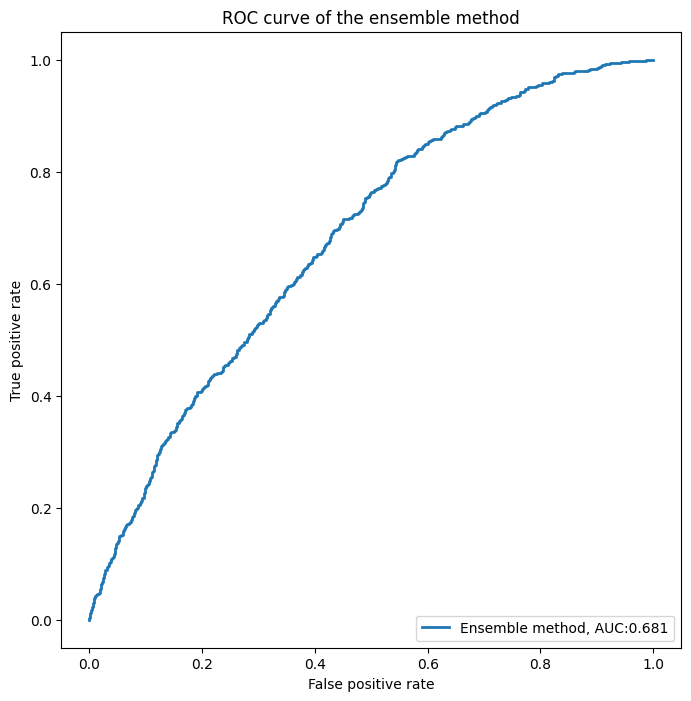

In [92]:
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, ensemble_proba)

plt.figure(figsize=(8,8))
plt.plot(fpr_ensemble, tpr_ensemble, linewidth=2, label=f"Ensemble method, AUC:{round(metrics.roc_auc_score(y_test, ensemble_proba),3)}")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of the ensemble method')
plt.legend(loc=4)


¿Qué otros métodos de ensamble que combinen varios algoritmos conoce?

```
# Escribir la respuesta
```


In [93]:
# Escribir el código

¿Cómo se determina la clase de cada observación individual con este algoritmo que combina varios algoritmos?

```
Hard Voting: cada clasificador en el ensamble vota por una clase, y la clase con la mayoría de los votos se elige como la predicción final.

Soft Voting: se promedian las probabilidades de predicción para cada clase de todos los clasificadores, y la clase con el mayor promedio de probabilidad se selecciona como la predicción final.

Si no especificamos el tipo de votación en el VotingClassifier se utilizará por defecto es "hard"
```


````
# código alternativo para stacking
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Método para las predicciones de los estimadores base
  )
````

# 14. Conclusiones Finales

Obtenemos mejores resultados con el algoritmo random forest o el algoritmo que incluye random forest, suppor vector machine y regresión logística (tome en cuenta la métrica AUC y las métricas de la matriz de confusión).

```
# Escribir la respuesta
```